In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [3,3]



In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("../resources/Diabetes.bif")
#gnb.showBN(bn,size='8')
print(bn)




BN{nodes: 413, arcs: 602, domainSize: 10^406.108, parameters: 461069, compression ratio: 100-10^-398.444% }


### First, some helpers

In [3]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.clock()
        return self

    def __exit__(self, *args):
        self.end = time.clock()
        self.interval = self.end - self.start
        
        

In [4]:
def execute(ie):
    with Timer() as t:
        ie.makeInference()
        for i in bn.ids():
            a=ie.posterior(i)
    print("duration : {:3.3f}s".format(t.interval))
    
def compare(ie,ie2):
    exact=[]
    appro=[]
    for node in bn.ids():
        # potentials as numpy array
        exact+=ie.posterior(node).tolist()
        appro+=ie2.posterior(node).tolist()

    plot(exact,appro,'ro')
    
    

### Exact inference.

duration : 1.638s


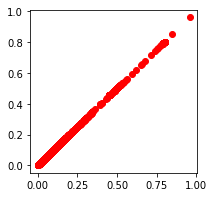

In [5]:
# timer in
ie=gum.LazyPropagation(bn)
execute(ie)
compare(ie,ie)



<h1>Loopy Belief Propagation</h1>

Like other approximated algorithm (GibbsInference), Loopy belief propagations inference iterations can be stopped :
<ul>
<li> by the value of error (epsilon)</li>
<li> by the rate of change of epsilon (MinEpsilonRate)</li>
<li> by the number of iteration (MaxIteration)</li>
<li> by the duration of the algorithm (MaxTime)</li>
</ul>

duration : 0.908s
stopped with epsilon=1e-08


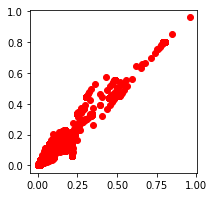

In [6]:
ie2=gum.LoopyBeliefPropagation(bn)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)



<H1>GIBBS vs LBP</H1>

Let's try a Gibbs Inference with the same amount of time :

duration : 1.147s
stopped with timeout=1


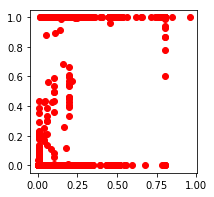

In [7]:
ie2=gum.GibbsInference(bn)
ie2.setMaxTime(1)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)



<H2>More time for Gibbs</H2>

duration : 120.901s
stopped with timeout=120


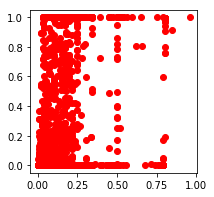

In [8]:
ie2=gum.GibbsInference(bn)
ie2.setMaxTime(120)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)

